In [ ]:
import physiokit as pk


for preprocess in preprocesses:
    match preprocess.name:
        case "filter":
            x = pk.signal.filter_signal(x, sample_rate=sample_rate, **preprocess.params)
        case "znorm":
            x = pk.signal.normalize_signal(x, **preprocess.params)
        case _:
            raise ValueError(f"Unknown preprocess '{preprocess.name}'")
    # END MATCH
# END FOR


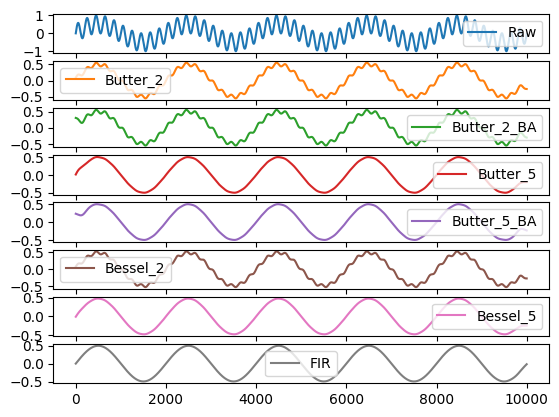

In [3]:
import numpy as np
import pandas as pd
import neurokit2 as nk


signal = nk.signal_simulate(duration=10, frequency=0.5)  # Low freq
signal += nk.signal_simulate(duration=10, frequency=5)  # High freq

# Lowpass filtering
fig1 = pd.DataFrame({
    "Raw": signal,
    "Butter_2": nk.signal_filter(signal, highcut=3, method='butterworth', order=2),
    "Butter_2_BA": nk.signal_filter(signal, highcut=3, method='butterworth_ba', order=2),
    "Butter_5": nk.signal_filter(signal, highcut=3, method='butterworth', order=5),
    "Butter_5_BA": nk.signal_filter(signal, highcut=3, method='butterworth_ba', order=5),
    "Bessel_2": nk.signal_filter(signal, highcut=3, method='bessel', order=2),
    "Bessel_5": nk.signal_filter(signal, highcut=3, method='bessel', order=5),
    "FIR": nk.signal_filter(signal, highcut=3, method='fir')
}).plot(subplots=True)


# Highpass filter

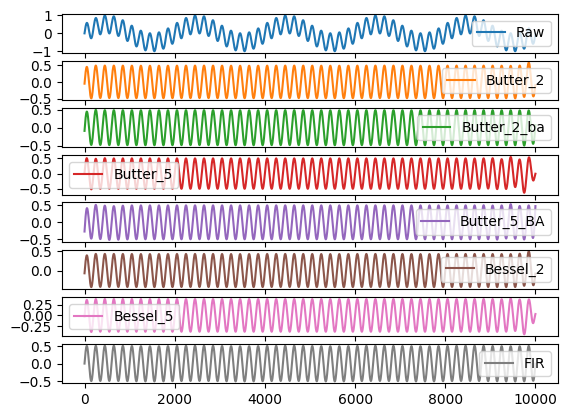

In [4]:
fig2 = pd.DataFrame({
    "Raw": signal,
    "Butter_2": nk.signal_filter(signal, lowcut=2, method='butterworth', order=2),
    "Butter_2_ba": nk.signal_filter(signal, lowcut=2, method='butterworth_ba', order=2),
    "Butter_5": nk.signal_filter(signal, lowcut=2, method='butterworth', order=5),
    "Butter_5_BA": nk.signal_filter(signal, lowcut=2, method='butterworth_ba', order=5),
    "Bessel_2": nk.signal_filter(signal, lowcut=2, method='bessel', order=2),
    "Bessel_5": nk.signal_filter(signal, lowcut=2, method='bessel', order=5),
    "FIR": nk.signal_filter(signal, lowcut=2, method='fir')
}).plot(subplots=True)


# Bandpass filtering

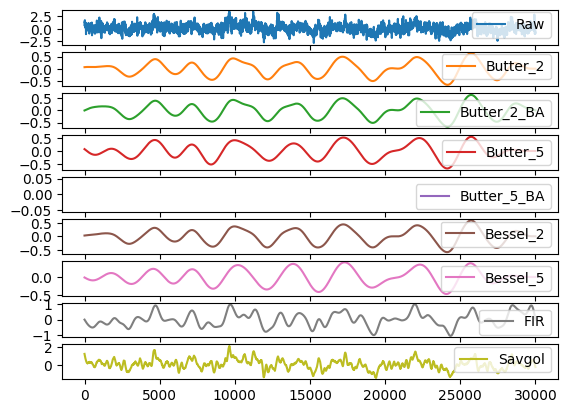

In [6]:
original = nk.rsp_simulate(duration=30, method="breathmetrics", noise=0)
signal = nk.signal_distort(original, noise_frequency=[0.1, 2, 10, 100], noise_amplitude=1, powerline_amplitude=1)

fig3 = pd.DataFrame({
    "Raw": signal,
    "Butter_2": nk.signal_filter(signal, lowcut=10/60, highcut=30/60, method='butterworth', order=2),
    "Butter_2_BA": nk.signal_filter(signal, lowcut=10/60, highcut=30/60, method='butterworth_ba', order=2),
    "Butter_5": nk.signal_filter(signal, lowcut=10/60, highcut=30/60, method='butterworth', order=5),
    "Butter_5_BA": nk.signal_filter(signal, lowcut=10/60, highcut=30/60, method='butterworth_ba', order=5),
    "Bessel_2": nk.signal_filter(signal, lowcut=10/60, highcut=30/60, method='bessel', order=2),
    "Bessel_5": nk.signal_filter(signal, lowcut=10/60, highcut=30/60, method='bessel', order=5),
    "FIR": nk.signal_filter(signal, lowcut=10/60, highcut=30/60, method='fir'),
    "Savgol": nk.signal_filter(signal, method='savgol')
}).plot(subplots=True)


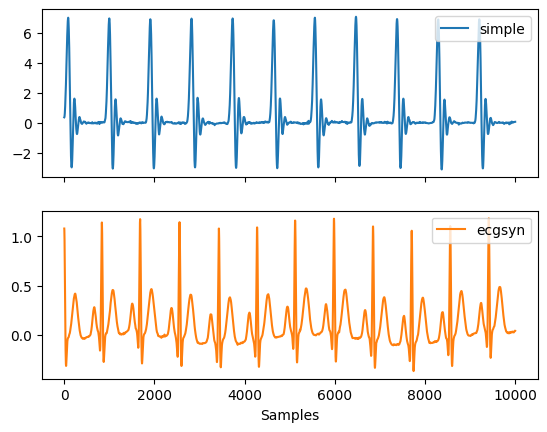

In [11]:
ecg1 = nk.ecg_simulate(duration=10, method="simple")
ecg2 = nk.ecg_simulate(duration=10, method="ecgsyn")

nk.signal_plot([ecg1, ecg2], labels=["simple", "ecgsyn"], subplots=True)


# ECG Bandpass Filtering

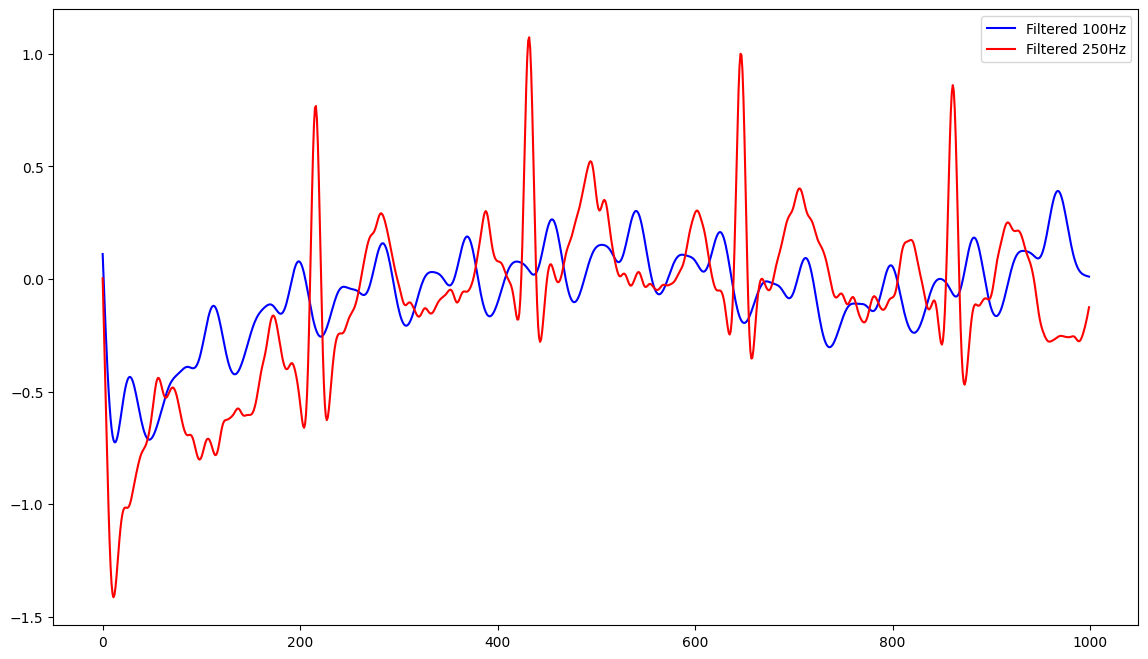

In [55]:
import matplotlib.pyplot as plt
import scipy

# Simulate an ECG signal with a sampling rate of 250 Hz
ecg_250signal = nk.ecg_simulate(duration=10, sampling_rate=250, noise=0.01)

# Add some high frequency noise
noise = np.random.normal(0, 0.1, len(ecg_250signal))
noisy_250signal = ecg_250signal + noise

# Resample the 250 Hz signal down to 100 Hz
noisy_100signal = scipy.signal.resample(noisy_250signal, len(noisy_250signal) * 100 // 250)

# Make sure both signals have the same length
min_length = min(len(noisy_100signal), len(noisy_250signal))
noisy_100signal = noisy_100signal[:min_length]
noisy_250signal = noisy_250signal[:min_length]

# Apply the bandpass filter to both signals
filtered_100signal = nk.signal_filter(noisy_100signal, lowcut=1, highcut=30, method='butterworth', order=3)
filtered_250signal = nk.signal_filter(noisy_250signal, lowcut=1, highcut=75, method='butterworth', order=3)

# Create a DataFrame
df = pd.DataFrame({"Raw100": noisy_100signal, "Filtered100": filtered_100signal, "Raw250": noisy_250signal, "Filtered250": filtered_250signal})

# Plot the raw and filtered signals
plt.figure(figsize=(14, 8))
# plt.plot(df['Raw100'], label='Raw 100Hz', color='lightblue', linestyle='--')
plt.plot(df['Filtered100'], color='blue', label='Filtered 100Hz')
# plt.plot(df['Raw250'], label='Raw 250Hz', color='salmon', linestyle='--')
plt.plot(df['Filtered250'], color='red', label='Filtered 250Hz')
plt.legend(loc='upper right')
plt.show()



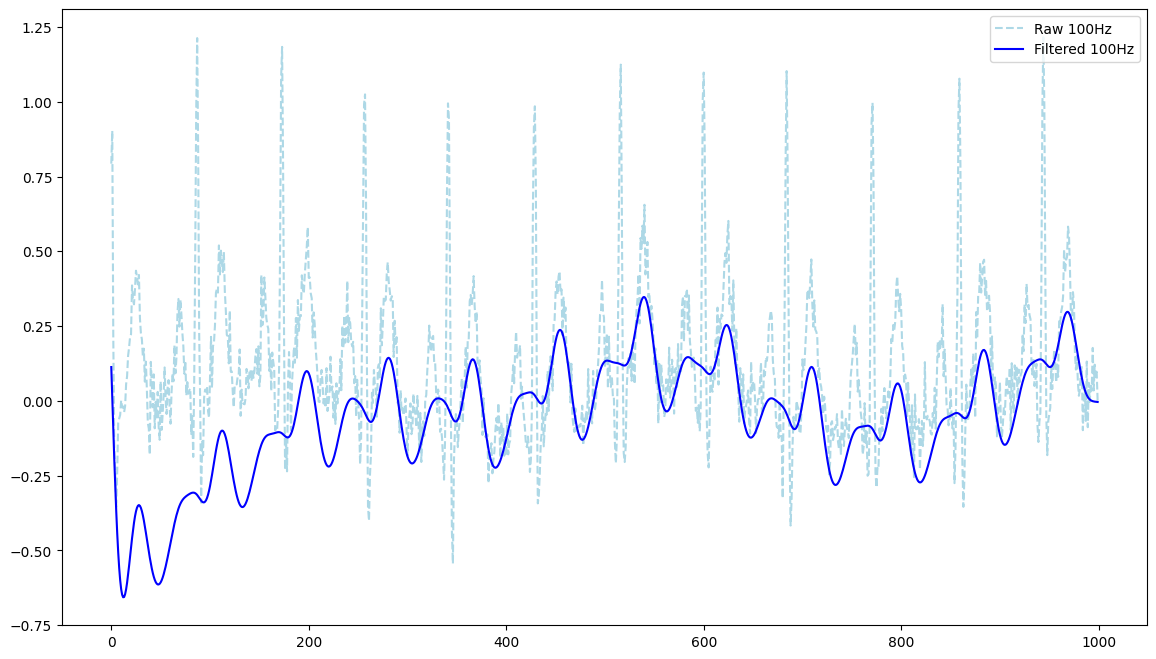

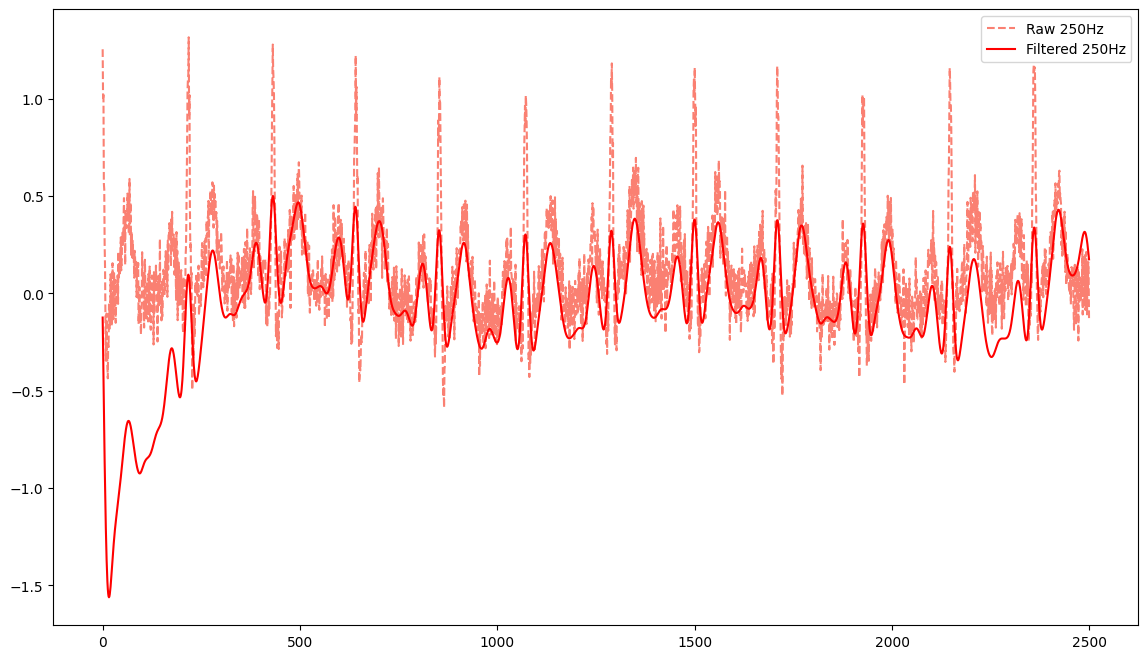

In [52]:
import matplotlib.pyplot as plt
import scipy

# Simulate an ECG signal with a sampling rate of 250 Hz
ecg_250signal = nk.ecg_simulate(duration=10, sampling_rate=250, noise=0.01)

# Add some high frequency noise
noise = np.random.normal(0, 0.1, len(ecg_250signal))
noisy_250signal = ecg_250signal + noise

# Resample the 250 Hz signal down to 100 Hz
noisy_100signal = scipy.signal.resample(noisy_250signal, len(noisy_250signal) * 100 // 250)


# Apply the bandpass filter to both signals
filtered_100signal = nk.signal_filter(noisy_100signal, lowcut=1, highcut=30, method='butterworth', order=3)
filtered_250signal = nk.signal_filter(noisy_250signal, lowcut=1, highcut=30, method='butterworth', order=3)

# Create a DataFrame
df = pd.DataFrame({"Raw100": noisy_100signal, "Filtered100": filtered_100signal})

# Plot the raw and filtered signals
plt.figure(figsize=(14, 8))
plt.plot(df['Raw100'], label='Raw 100Hz', color='lightblue', linestyle='--')
plt.plot(df['Filtered100'], color='blue', label='Filtered 100Hz')
plt.legend(loc='upper right')
plt.show()

df = pd.DataFrame({"Raw250": noisy_250signal, "Filtered250": filtered_250signal})
# Plot the raw and filtered signals
plt.figure(figsize=(14, 8))
plt.plot(df['Raw250'], label='Raw 250Hz', color='salmon', linestyle='--')
plt.plot(df['Filtered250'], color='red', label='Filtered 250Hz')
plt.legend(loc='upper right')
plt.show()





## Check where the prediction fails

In [26]:
! heartkit \
    --task arrhythmia \
    --mode demo \
    --config ./configs/arrhythmia-class-2.json

2024-03-06 15:29:53.439787: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-06 15:29:53.442997: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 15:29:53.480836: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 15:29:53.480873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 15:29:53.482132: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

The image shows that the P waves are irregular and not clearly visible, which indicates AFIB. The QRS complexes are also irregular and have different shapes, which indicates AFL. The PR interval is variable and sometimes absent, which indicates a lack of coordination between the atria and the ventricles. The QT interval is normal, which means the ventricles are recovering normally. The RR interval is irregular and varies widely, which means the heart rate is unstable.

<img src="results/arrhythmia-class-2/demo_plot.png" width="1080" height="360" align="left">

<img src="results/arrhythmia-class-2/second_plot.png" width="1080" height="360" align="left">

<img src="results/arrhythmia-100class-2/third_plot.png" width="1080" height="360" align="left">

<img src="results/arrhythmia-100class-2/Afib_region.png" width="1080" height="360" align="left">

## Call Demo directly from the class

In [ ]:
# ds = load_datasets(
#     ds_path=params.ds_path,
#     frame_size=5 * params.frame_size,
#     sampling_rate=params.sampling_rate,
#     class_map=class_map,
#     spec=input_spec,
#     datasets=params.datasets,
# )[0]

In [59]:
import os

from heartkit.tasks import TaskFactory
from typing import Type, TypeVar
from argdantic import ArgField, ArgParser
from pydantic import BaseModel

from heartkit.defines import (
    HKDemoParams
)


cli = ArgParser()
B = TypeVar("B", bound=BaseModel)


def parse_content(cls: Type[B], content: str) -> B:
    """Parse file or raw content into Pydantic model.

    Args:
        cls (B): Pydantic model subclasss
        content (str): File path or raw content

    Returns:
        B: Pydantic model subclass instance
    """
    if os.path.isfile(content):
        with open(content, "r", encoding="utf-8") as f:
            content = f.read()

    return cls.model_validate_json(json_data=content)

task="arrhythmia"
task_handler = TaskFactory.get(task)

# In demo we will cover 5 regions at a time, frame_size*5
config = 'configs/arrhythmia-100class-2.json'
task_handler.demo(parse_content(HKDemoParams, config))

[03/06/24 20:20:33] INFO     Running inference                                                    ]8;id=149723;file:///home/justinz/heartkit/heartkit/tasks/arrhythmia/arrhythmia.py\arrhythmia.py]8;;\:]8;id=695207;file:///home/justinz/heartkit/heartkit/tasks/arrhythmia/arrhythmia.py#438\438]8;;\

Inference:   0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 297ms/step


Inference:  20%|██        | 1/5 [00:00<00:01,  3.03it/s]

1/1 [==============================] - 0s 32ms/step


Inference:  80%|████████  | 4/5 [00:00<00:00,  9.61it/s]

1/1 [==============================] - 0s 16ms/step


Inference: 100%|██████████| 5/5 [00:00<00:00,  9.47it/s]


                    INFO     Generating report                                                    ]8;id=496452;file:///home/justinz/heartkit/heartkit/tasks/arrhythmia/arrhythmia.py\arrhythmia.py]8;;\:]8;id=634184;file:///home/justinz/heartkit/heartkit/tasks/arrhythmia/arrhythmia.py#454\454]8;;\

                    INFO     Report saved to results/arrhythmia-100class-2/demo.html              ]8;id=878557;file:///home/justinz/heartkit/heartkit/tasks/arrhythmia/arrhythmia.py\arrhythmia.py]8;;\:]8;id=889509;file:///home/justinz/heartkit/heartkit/tasks/arrhythmia/arrhythmia.py#516\516]8;;\

In [34]:
parse_content(HKDemoParams, config)

HKDemoParams(job_dir=PosixPath('results/arrhythmia-100class-2'), ds_path=PosixPath('datasets'), datasets=[DatasetParams(name='icentia11k', params={})], sampling_rate=100, frame_size=400, num_classes=2, preprocesses=[PreprocessParams(name='filter', params={'lowcut': 1.0, 'highcut': 30, 'order': 3, 'forward_backward': True, 'axis': 0}), PreprocessParams(name='znorm', params={'eps': 0.01, 'axis': None})], augmentations=[], model_file='./results/arrhythmia-100class-2/model.keras', backend='pc', seed=None, samples_per_patient=[25, 200], train_patients=10000, val_file='./results/arrhythmia-100class-2-10000pt-100fs-4s.pkl', val_samples_per_patient=[25, 200], val_patients=0.2, val_size=100000, threshold=0.75, test_samples_per_patient=[10, 100], test_patients=1000, test_size=20000, batch_size=256, buffer_size=100000, epochs=125, steps_per_epoch=20, val_metric='loss', lr_rate=0.001, lr_cycles=1, val_acc_threshold=0.98, tflm_var_name='g_arrhythmia_model', tflm_file='./results/arrhythmia-100class-